<a href="https://colab.research.google.com/github/NickMuhigi/Summative_Intro_To_ML_assignment.ipynb/blob/main/Summative_Intro_to_ml_%5BNicolas_Muhigi%5D_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency..

A Notebook detailing the following

* Project name
* Clear out puts from cells






**Instructions**

1. Acquire a dataset suitable for ML tasks as per your proposal.
2. Implement a simple machine learning model based on neural networks on the chosen dataset without any defined optimization techniques. (Check instructions)
3. Implement and compare the model's performance after applying 3 to 4 disntict combinations regularization and optimization techniques.
4. Discuss the results on the README file.
5. Make predictions using test data
7. Implement error analysis techniques and ensure there is: F1-Score, Recall, Precision, RUC a confusion matrix using plotting libraries (not verbose)

Submit notebook to github repo




# Case Study and Implementation




In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, RMSprop, Nadam

import io
from IPython.display import display
import ipywidgets as widgets


# The Dataset
> ***Brief Description:***
State the Problem and A short Description of the data


In [65]:
# The Dataset
# > ***Brief Description:***
# The problem is to predict whether an earthquake has a high magnitude (>= 6.0) based on geographical and seismic features.
# The first dataset contains earthquake events with Latitude, Longitude, Depth, and Magnitude.
# The second dataset is provided optionally for further analysis or comparison.

import pandas as pd
import io
from tkinter import Tk
from tkinter.filedialog import askopenfilename

# Function to upload a single CSV file (for local environments)
def upload_csv_file(prompt="Select a CSV file"):
    root = Tk()
    root.withdraw()  # Hide the root window
    file_path = askopenfilename(title=prompt, filetypes=[("CSV files", "*.csv")])
    if file_path:
        return pd.read_csv(file_path)
    else:
        print("No file selected.")
        return None

from google.colab import files
from sklearn.model_selection import train_test_split

# Upload two CSV files (Google Colab environment)
print("Please upload two CSV files.")
uploaded = files.upload()

# Read uploaded files into dataframes
dataframes = []
for filename in uploaded.keys():
    df = pd.read_csv(io.BytesIO(uploaded[filename]))
    dataframes.append(df)

if len(dataframes) < 2:
    print("Please upload at least two CSV files.")
else:
    df1, df2 = dataframes[:2]

    # Clean and preprocess df1
    df1['Magnitude'] = pd.to_numeric(df1['Magnitude'], errors='coerce')
    df1 = df1.dropna(subset=['Magnitude', 'Latitude', 'Longitude', 'Depth'])
    df1['HighMag'] = (df1['Magnitude'] >= 6.0).astype(int)
    df1 = df1[['Latitude', 'Longitude', 'Depth', 'Magnitude', 'HighMag']]

    print("First dataset preview:")
    display(df1.head())

    # Prepare features and labels
    X = df1[['Latitude', 'Longitude', 'Depth', 'Magnitude']]
    y = df1['HighMag']

    # Train-validation-test split
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    print(f"Train set size: {len(X_train)}")
    print(f"Validation set size: {len(X_val)}")
    print(f"Test set size: {len(X_test)}")

    # Optional: show second dataset
    print("Second dataset preview:")
    display(df2.head())


Please upload two CSV files.


Saving database.csv to database (2).csv
Saving rdwdata.csv to rdwdata (6).csv
First dataset preview:


,Latitude,Longitude,Depth,Magnitude,HighMag
0,19.246,145.616,131.6,6.0,1
1,1.863,127.352,80.0,5.8,0
2,-20.579,-173.972,20.0,6.2,1
3,-59.076,-23.557,15.0,5.8,0
4,11.938,126.427,15.0,5.8,0


Train set size: 16388
Validation set size: 3512
Test set size: 3512
Second dataset preview:


,Province,BTOTL_2015,B0004_2015,B0509_2015,B1014_2015,B1519_2015,B2024_2015,B2529_2015,B3034_2015,B3539_2015,...,F3539_2030,F4044_2030,F4549_2030,F5054_2030,F5559_2030,F6064_2030,F6569_2030,F7074_2030,F7579_2030,F80PL_2030
0,KIGALI,"1,286,518","188,024","140,389","116,870","133,493","155,772","174,991","134,824","86,057",...,"71,652","64,930","45,732","26,430","16,753","12,112","10,469","8,222","4,950","3,231"
1,SOUTHERN PROVINCE,"2,758,686","419,189","396,961","337,388","290,233","211,648","233,559","204,793","150,415",...,"97,829","116,957","105,043","76,380","53,951","42,530","34,114","26,290","14,149","8,720"
2,WESTERN PROVINCE,"2,605,698","417,850","387,346","336,921","286,144","227,452","227,033","186,702","129,687",...,"84,986","89,092","77,963","62,821","42,843","32,090","26,466","19,702","11,277","7,786"
3,NORTHERN PROVINCE,"1,781,920","252,481","260,588","237,873","201,726","156,463","158,330","125,728","92,293",...,"55,788","59,240","51,046","38,114","27,664","22,218","18,881","14,217","9,087","5,995"
4,EASTERN PROVINCE,"2,942,871","488,008","440,728","360,218","304,146","250,059","254,331","215,404","165,480",...,"159,315","168,964","137,184","97,716","65,135","50,221","43,372","29,808","16,661","10,118"


#SECTION 1: Model Architecture:




>
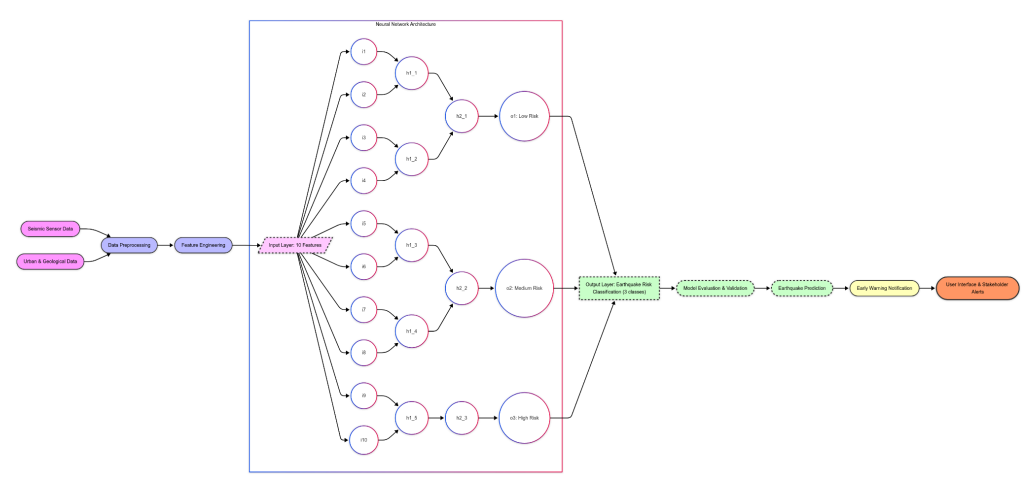




#Task: Define a function that creates models without and With specified Optimization techniques


In [66]:
def define_model(optimizer='adam', use_regularizer=False, early_stopping=False, dropout=0.0, learning_rate=0.001):
    model = Sequential()
    reg = l2(0.002) if use_regularizer else None

    model.add(Dense(64, activation='relu', input_shape=(4,), kernel_regularizer=reg))
    if dropout > 0:
        model.add(Dropout(dropout))
    model.add(Dense(32, activation='relu', kernel_regularizer=reg))
    model.add(Dense(1, activation='sigmoid'))

    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        opt = RMSprop(learning_rate=learning_rate)
    elif optimizer == 'nadam':
        opt = Nadam(learning_rate=learning_rate)
    else:
        opt = Adam(learning_rate=learning_rate)

    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

    callbacks = [EarlyStopping(monitor='val_loss', patience=6, min_delta=0.002)] if early_stopping else []

    history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val), verbose=1, callbacks=callbacks)
    return model, history

# Task: Print out the Final Model Accuracy and plot the Loss curve

In [67]:
def loss_curve_plot(history):
    plt.plot(history.history['loss'], 'bo', label='Training loss')
    plt.plot(history.history['val_loss'], 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

In [69]:
X = df1[['Latitude', 'Longitude', 'Depth', 'Magnitude']]
y = df1['HighMag']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


513/513 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5831 - loss: 2.2425 - val_accuracy: 0.4337 - val_loss: 0.9064
Epoch 2/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6301 - loss: 0.7314 - val_accuracy: 0.6780 - val_loss: 0.6248
Epoch 3/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6622 - loss: 0.6671 - val_accuracy: 0.6321 - val_loss: 0.6288
Epoch 4/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6576 - loss: 0.6671 - val_accuracy: 0.6965 - val_loss: 0.6240
Epoch 5/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6773 - loss: 0.6372 - val_accuracy: 0.7019 - val_loss: 0.6088
Epoch 6/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6743 - loss: 0.6482 - val_accuracy: 0.7118 - val_loss: 0.6135
Epoch 7/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6860 - loss: 0.6359 - val_accuracy: 0.6902 - val_loss: 0.6028
Epoch 8/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7021 - loss: 0.6117 - val_accuracy: 0.7064 - val_

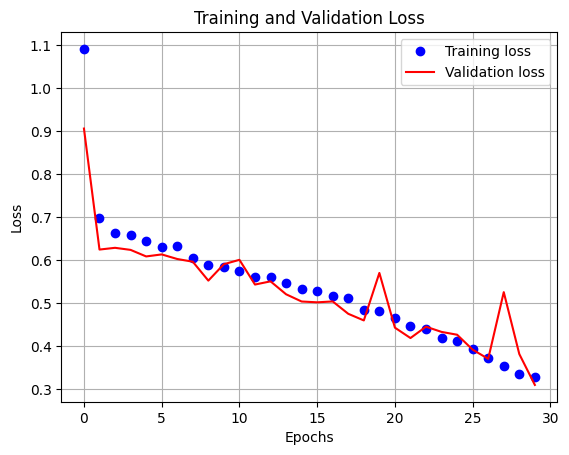

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Baseline Model Accuracy: 0.8878
Baseline Model F1 Score: 0.7986
Baseline Model Recall: 0.6845
Baseline Model Precision: 0.9583


In [70]:
model_1, history_1 = define_model(optimizer='adam', use_regularizer=False, early_stopping=False, dropout=0.0, learning_rate=0.001)

loss_curve_plot(history_1)

y_pred_1 = (model_1.predict(X_test) > 0.5).astype("int32")

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

accuracy_1 = accuracy_score(y_test, y_pred_1)
f1_1 = f1_score(y_test, y_pred_1)
recall_1 = recall_score(y_test, y_pred_1)
precision_1 = precision_score(y_test, y_pred_1)

print(f"Baseline Model Accuracy: {accuracy_1:.4f}")
print(f"Baseline Model F1 Score: {f1_1:.4f}")
print(f"Baseline Model Recall: {recall_1:.4f}")
print(f"Baseline Model Precision: {precision_1:.4f}")


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


513/513 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6010 - loss: 1.2926 - val_accuracy: 0.6763 - val_loss: 0.6486
Epoch 2/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6449 - loss: 0.7197 - val_accuracy: 0.6617 - val_loss: 0.8147
Epoch 3/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6563 - loss: 0.6888 - val_accuracy: 0.7107 - val_loss: 0.7259
Epoch 4/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6543 - loss: 0.6775 - val_accuracy: 0.7010 - val_loss: 0.6290
Epoch 5/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6689 - loss: 0.6640 - val_accuracy: 0.5988 - val_loss: 0.6467
Epoch 6/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6848 - loss: 0.6256 - val_accuracy: 0.6726 - val_loss: 0.6931
Epoch 7/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6892 - loss: 0.6352 - val_accuracy: 0.7210 - val_loss: 0.5723
Epoch 8/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6857 - loss: 0.6308 - val_accuracy: 0.7190 - val_

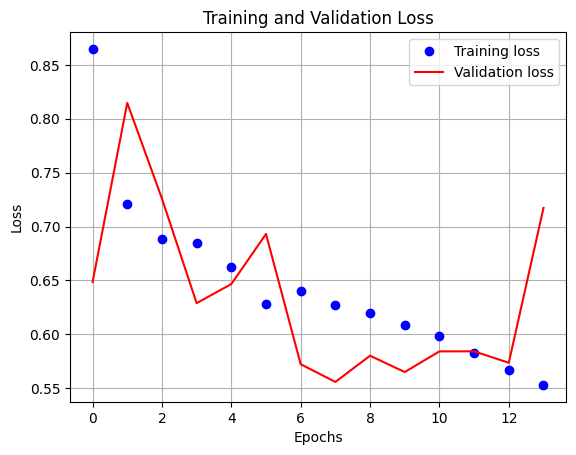

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
              precision    recall  f1-score   support

           0       0.68      1.00      0.81      2371
           1       0.85      0.04      0.08      1141

    accuracy                           0.69      3512
   macro avg       0.77      0.52      0.45      3512
weighted avg       0.74      0.69      0.57      3512



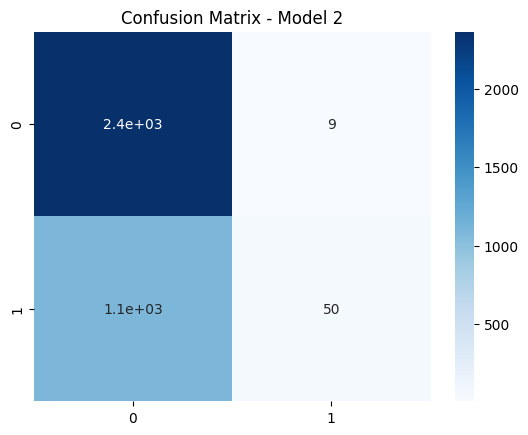

In [71]:
model_2, history_2 = define_model(optimizer='adam', early_stopping=True)
loss_curve_plot(history_2)

y_pred_2 = (model_2.predict(X_test) > 0.5).astype("int32")

print(classification_report(y_test, y_pred_2))

sns.heatmap(confusion_matrix(y_test, y_pred_2), annot=True, cmap='Blues')
plt.title("Confusion Matrix - Model 2")
plt.show()

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5962 - loss: 1.1087 - val_accuracy: 0.6036 - val_loss: 1.0132
Epoch 2/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6167 - loss: 0.8136 - val_accuracy: 0.4137 - val_loss: 1.2016
Epoch 3/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6141 - loss: 0.7632 - val_accuracy: 0.4878 - val_loss: 1.0400
Epoch 4/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6358 - loss: 0.7057 - val_accuracy: 0.6856 - val_loss: 0.8008
Epoch 5/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6662 - loss: 0.6754 - val_accuracy: 0.6523 - val_loss: 0.6739
Epoch 6/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6634 - loss: 0.6510 - val_accuracy: 0.6726 - val_loss: 0.6893
Epoch 7/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6766 - loss: 0.6306 - val_accuracy: 0.7013 - val_loss: 0.6862
Epoch 8/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6935 - loss: 0.6096 - val_accuracy: 0.6489 - val_

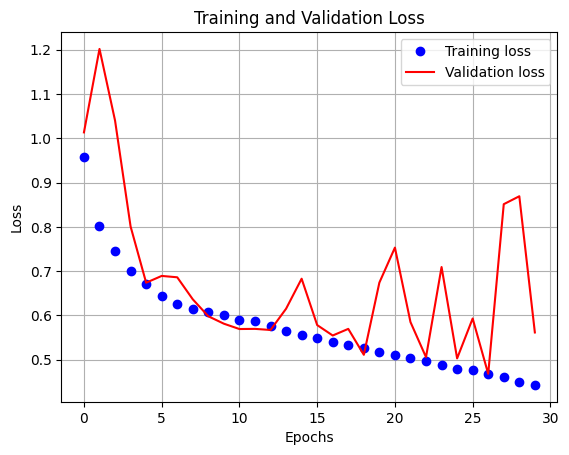

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
              precision    recall  f1-score   support

           0       0.72      1.00      0.84      2371
           1       0.96      0.19      0.32      1141

    accuracy                           0.73      3512
   macro avg       0.84      0.59      0.58      3512
weighted avg       0.80      0.73      0.67      3512



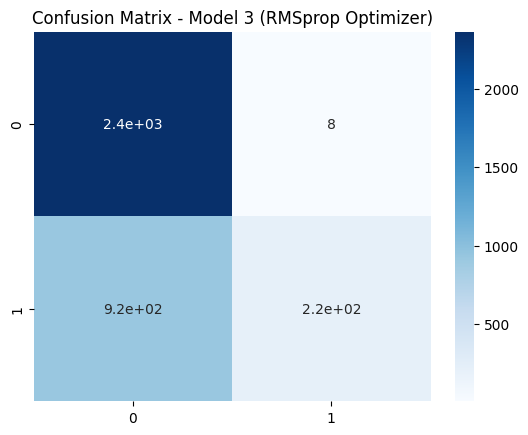

In [72]:
model_3, history_3 = define_model(optimizer='rmsprop', use_regularizer=False, early_stopping=True)
loss_curve_plot(history_3)

y_pred_3 = (model_3.predict(X_test) > 0.5).astype("int32")

print(classification_report(y_test, y_pred_3))

sns.heatmap(confusion_matrix(y_test, y_pred_3), annot=True, cmap='Blues')
plt.title("Confusion Matrix - Model 3 (RMSprop Optimizer)")
plt.show()

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


513/513 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6082 - loss: 1.4436 - val_accuracy: 0.5681 - val_loss: 0.7256
Epoch 2/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6481 - loss: 0.7059 - val_accuracy: 0.4772 - val_loss: 0.8012
Epoch 3/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6557 - loss: 0.6898 - val_accuracy: 0.6358 - val_loss: 0.8295
Epoch 4/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6599 - loss: 0.6783 - val_accuracy: 0.6802 - val_loss: 0.6431
Epoch 5/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6741 - loss: 0.6464 - val_accuracy: 0.6495 - val_loss: 0.6589
Epoch 6/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6848 - loss: 0.6426 - val_accuracy: 0.7087 - val_loss: 0.5836
Epoch 7/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6859 - loss: 0.6216 - val_accuracy: 0.7081 - val_loss: 0.5758
Epoch 8/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6923 - loss: 0.6236 - val_accuracy: 0.7096 - val_

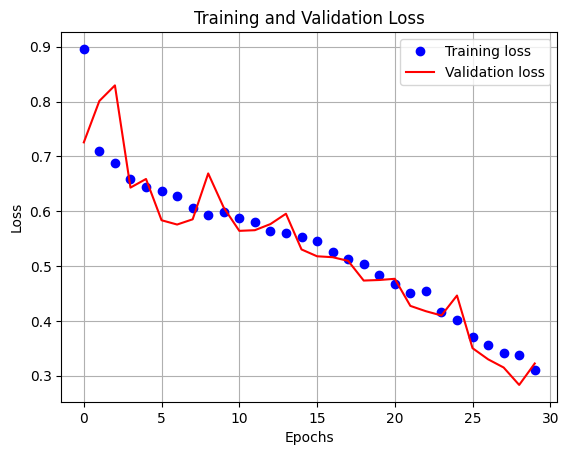

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      2371
           1       0.79      0.74      0.77      1141

    accuracy                           0.85      3512
   macro avg       0.84      0.82      0.83      3512
weighted avg       0.85      0.85      0.85      3512



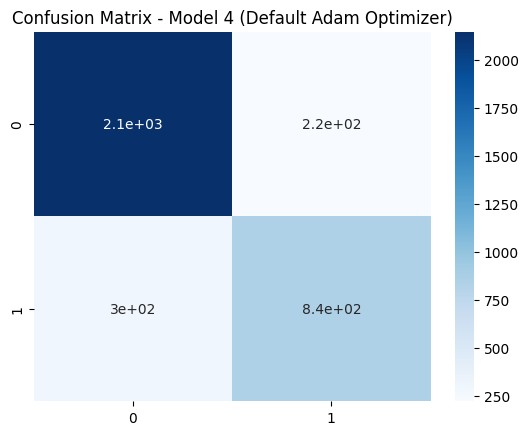

In [73]:
model_4, history_4 = define_model(optimizer='adam', use_regularizer=False, early_stopping=True)
loss_curve_plot(history_4)

y_pred_4 = (model_4.predict(X_test) > 0.5).astype("int32")

print(classification_report(y_test, y_pred_4))

sns.heatmap(confusion_matrix(y_test, y_pred_4), annot=True, cmap='Blues')
plt.title("Confusion Matrix - Model 4 (Default Adam Optimizer)")
plt.show()

#Task: Make Predictions using the best saved model


Create a confusion Matrix and F1 score for both Models. Ensure outputs for the cells are visible

Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
=== Model 2 (Adam + Reg) Classification Report ===
              precision    recall  f1-score   support

           0       0.68      1.00      0.81      2371
           1       0.85      0.04      0.08      1141

    accuracy                           0.69      3512
   macro avg       0.77      0.52      0.45      3512
weighted avg       0.74      0.69      0.57      3512

Model 2 (Adam + Reg) F1 Score: 0.0833


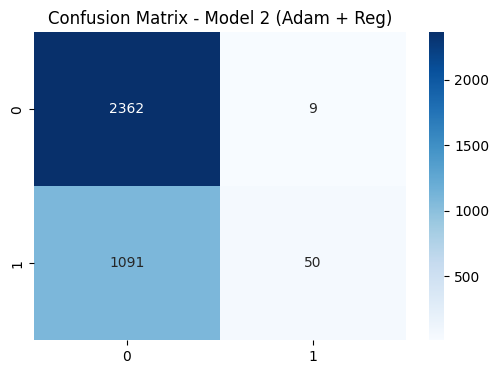

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
=== Model 3 (RMSprop, no Reg) Classification Report ===
              precision    recall  f1-score   support

           0       0.72      1.00      0.84      2371
           1       0.96      0.19      0.32      1141

    accuracy                           0.73      3512
   macro avg       0.84      0.59      0.58      3512
weighted avg       0.80      0.73      0.67      3512

Model 3 (RMSprop, no Reg) F1 Score: 0.3177


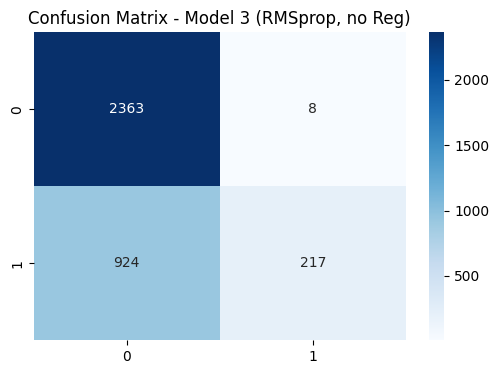

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
=== Model 4 (Adam, no Reg) Classification Report ===
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      2371
           1       0.79      0.74      0.77      1141

    accuracy                           0.85      3512
   macro avg       0.84      0.82      0.83      3512
weighted avg       0.85      0.85      0.85      3512

Model 4 (Adam, no Reg) F1 Score: 0.7654


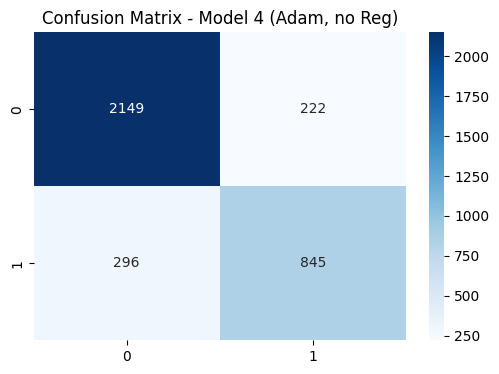

Best model selected: Model 4 (Adam, no Reg) with F1 Score: 0.7654
Best model saved as 'best_earthquake_model.h5'


110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
=== Classification Report for Loaded Model ===
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      2371
           1       0.79      0.74      0.77      1141

    accuracy                           0.85      3512
   macro avg       0.84      0.82      0.83      3512
weighted avg       0.85      0.85      0.85      3512



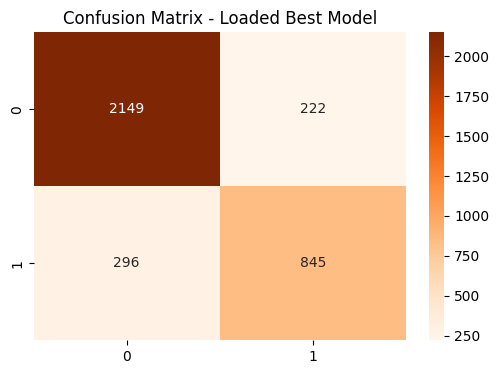

🎉 Congratulations!! Your predictions are complete.


In [74]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model


models = {
    "Model 2 (Adam + Reg)": model_2,
    "Model 3 (RMSprop, no Reg)": model_3,
    "Model 4 (Adam, no Reg)": model_4
}

f1_scores = {}

for name, model in models.items():
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    print(f"=== {name} Classification Report ===")
    print(classification_report(y_test, y_pred))
    f1 = f1_score(y_test, y_pred)
    f1_scores[name] = f1
    print(f"{name} F1 Score: {f1:.4f}")

    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


best_model_name = max(f1_scores, key=f1_scores.get)
best_model = models[best_model_name]

print(f"Best model selected: {best_model_name} with F1 Score: {f1_scores[best_model_name]:.4f}")


best_model.save('best_earthquake_model.h5')
print("Best model saved as 'best_earthquake_model.h5'")


def make_predictions(model_path, X):
    model = load_model(model_path)
    preds_prob = model.predict(X)
    predictions = (preds_prob > 0.5).astype("int32")
    return predictions


model_path = 'best_earthquake_model.h5'
predictions = make_predictions(model_path, X_test)

print("=== Classification Report for Loaded Model ===")
print(classification_report(y_test, predictions))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap='Oranges', fmt='d')
plt.title("Confusion Matrix - Loaded Best Model")
plt.show()

print("🎉 Congratulations!! Your predictions are complete.")


In [75]:
from sklearn.ensemble import RandomForestClassifier
import joblib
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
joblib.dump(rf_model, 'saved_models/random_forest_model.pkl')


['saved_models/random_forest_model.pkl']

In [76]:
from google.colab import files
files.download('saved_models/random_forest_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [77]:
import os
from google.colab import files

# Ensure the directory exists
os.makedirs('saved_models', exist_ok=True)

# Save only models 1, 2, and 3 using simplified names
model_1.save('saved_models/model_1.h5')
model_2.save('saved_models/model_2.h5')
model_3.save('saved_models/model_3.h5')

# Save model 4 as the best model
best_model.save('saved_models/best_earthquake_model.h5')

# Download the saved models
files.download('saved_models/model_1.h5')
files.download('saved_models/model_2.h5')
files.download('saved_models/model_3.h5')
files.download('saved_models/best_earthquake_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Congratulations!!
